Reference:
https://www.statology.org/partial-least-squares-in-python/

In [1]:
import os

os.chdir('../')
os.getcwd()

'C:\\Users\\212295\\PycharmProjects\\stock-explorer'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [24]:
#define URL where data is located
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"

#read in data
data_full = pd.read_csv(url)

#select subset of data
data = data_full[["mpg", "disp", "drat", "wt", "qsec", "hp"]]
data = data_full.iloc[:, 1:len(data_full.index)]

data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Text(0.5, 1.0, 'hp')

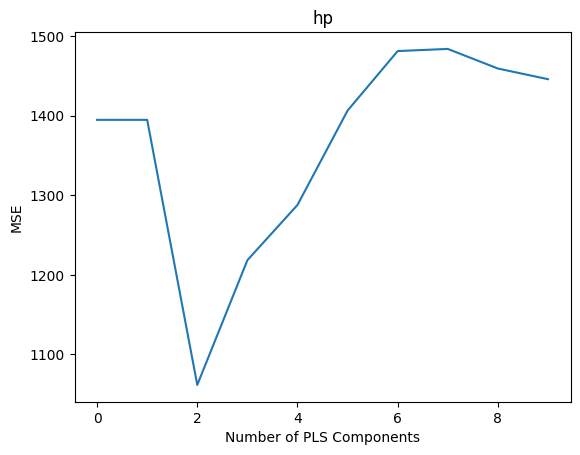

In [37]:
# define predictor and response variables
#X = data[["mpg", "disp", "drat", "wt", "qsec"]]
X = data[["mpg", "cyl", "disp", "drat", "wt", "qsec", "vs", "am", "gear", "carb"]]
y = data[["hp"]]

# define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
# score = -1 * model_selection.cross_val_score(PLSRegression(n_components=1), np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()
score = -1 * model_selection.cross_val_score(PLSRegression(n_components=1), scale(X), y, cv=cv, scoring='neg_mean_squared_error').mean()
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = -1 * model_selection.cross_val_score(pls, scale(X), y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

In [38]:
import numpy as np
from sklearn.model_selection import GridSearchCV


def get_optimal_n_comp(model, X, y, n_comp_max, cv=10) -> dict:
    # range of serach
    param = {
        'n_components': np.arange(1, n_comp_max)
    }
    # instance od\f grid search
    model_grid = GridSearchCV(
        model,
        param_grid=param,
        cv=cv
    )

    # grid search
    model_grid.fit(X, y)

    # optimal parameter
    print(model_grid.best_estimator_)
    print(model_grid.best_score_)

    return model_grid.best_params_

In [39]:
# define cross-validation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

pls = PLSRegression()
get_optimal_n_comp(pls, scale(X), y, min(len(X), len(X.columns)), cv)

PLSRegression(n_components=1)
0.33872965848070435


{'n_components': 1}